In [45]:
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from matplotlib import pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.python.keras import backend as K

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Num GPUs Available:  1
Default GPU Device: /device:GPU:0


In [3]:
config = tf.compat.v1.ConfigProto( device_count = {'GPU': 1, 'CPU': 1} )
sess = tf.compat.v1.Session(config=config)
K.set_session(sess)

In [13]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [61]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [15]:
unique_values = np.unique(y_train)
print("Unique values of y_train:", unique_values)

Unique values of y_train: [0 1 2 3 4 5 6 7 8 9]


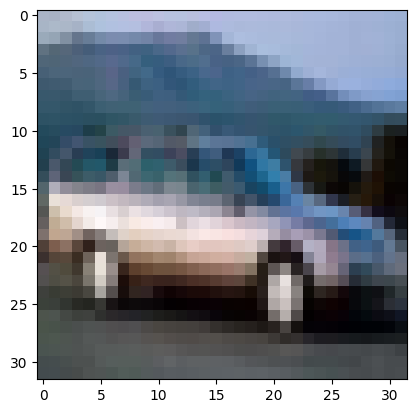

In [145]:
plt.imshow(x_train[4])

In [17]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [54]:
model = Sequential()
model.add(Input(shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(24,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(12,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_42 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_43 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_44 (Dropout)                 │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 24)                  │         196,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_45 (Dropout)                 │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 12)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_46 (Dropout)                 │ (None, 12)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 336,486 (1.28 MB)

 Trainable params: 336,486 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min',restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=100, batch_size=64,validation_data=(x_test,y_test), callbacks=[earlyStopping])

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.1588 - loss: 2.1822 - val_accuracy: 0.3417 - val_loss: 1.6817
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3244 - loss: 1.7218 - val_accuracy: 0.4630 - val_loss: 1.4553
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4349 - loss: 1.4982 - val_accuracy: 0.5778 - val_loss: 1.1957
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5043 - loss: 1.3457 - val_accuracy: 0.6158 - val_loss: 1.0820
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5456 - loss: 1.2438 - val_accuracy: 0.6471 - val_loss: 1.0062
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5801 - loss: 1.1673 - val_accuracy: 0.6659 - val_loss: 0.9713
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6053 - loss: 1.1037 - val_accuracy: 0.6759 - val_loss: 0.9223
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6183 - loss: 1.0756 - val_a

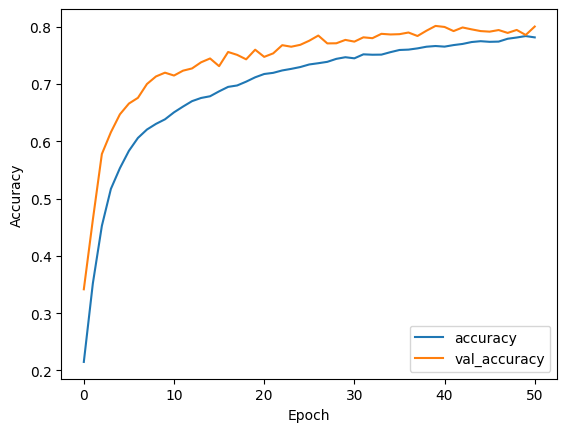

In [57]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [86]:
model.save('model1.keras')

In [70]:
model2 = Sequential()
model2.add(Input(shape=(32,32,3)))
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.1))

model2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model2.add(Flatten())
model2.add(Dropout(0.5))
model2.add(Dense(24,activation="relu"))
model2.add(Dropout(0.2))
model2.add(Dense(12,activation="relu"))
model2.add(Dropout(0.1))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_57 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_59 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_58 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_60 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_61 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_60 (Conv2D)                   │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_62 (Dropout)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 24)                  │          98,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_63 (Dropout)                 │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 12)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_64 (Dropout)                 │ (None, 12)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 10)                  │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 487,174 (1.86 MB)

 Trainable params: 487,174 (1.86 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
earlyStopping = EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='min',restore_best_weights=True)
model2History = model2.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test,y_test), callbacks=[earlyStopping])

loss, accuracy = model2.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3364 - loss: 1.7354 - val_accuracy: 0.4302 - val_loss: 1.5354
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3873 - loss: 1.6285 - val_accuracy: 0.5120 - val_loss: 1.3750
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4300 - loss: 1.5252 - val_accuracy: 0.5394 - val_loss: 1.3083
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4656 - loss: 1.4381 - val_accuracy: 0.5688 - val_loss: 1.2382
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4935 - loss: 1.3801 - val_accuracy: 0.6045 - val_loss: 1.1361
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5296 - loss: 1.2929 - val_accuracy: 0.6211 - val_loss: 1.0810
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5546 - loss: 1.2359 - val_accuracy: 0.6405 - val_loss: 1.0331
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5710 - loss: 1.1942 - val_accu

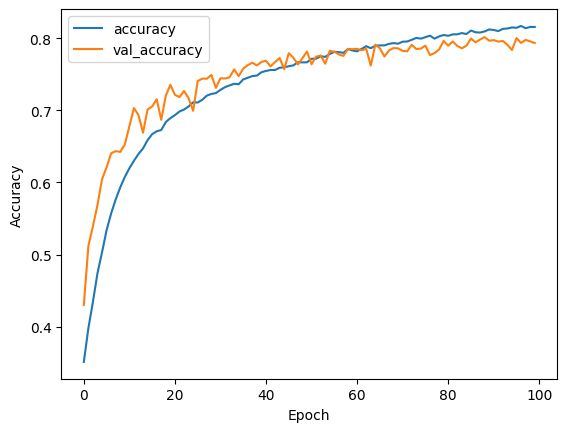

In [83]:
plt.plot(model2History.history['accuracy'], label='accuracy')
plt.plot(model2History.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [84]:
model2.save('model2.keras')

Image shape: (32, 32, 3)
Image data type: uint8


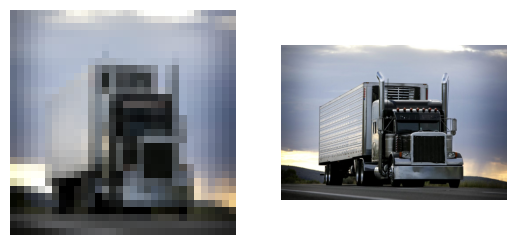

In [87]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


try:
  img = Image.open("./truck.jpg")

  img_resized = img.resize((32, 32))

  img_resized = np.array(img_resized)

  img = np.array(img)

  print("Image shape:", img_resized.shape)
  print("Image data type:", img_resized.dtype)

  plt.subplot(1, 2, 1)
  plt.imshow(img_resized)
  plt.axis('off')
  plt.subplot(1, 2, 2)
  plt.imshow(img)
  plt.axis('off')  # Turn off axis ticks and labels
  plt.show()

except FileNotFoundError:
  print(f"Error: Image file not found.")
except Exception as e:
  print(f"An error occurred: {e}")

In [75]:
y_hat = model.predict(np.array([img_resized]))
print("This is "+ class_names[np.argmax(y_hat)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
This is truck


In [82]:
y_hat

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [88]:
y_hat = model2.predict(np.array([img_resized]))
print("This is "+ class_names[np.argmax(y_hat)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 892ms/step
This is truck


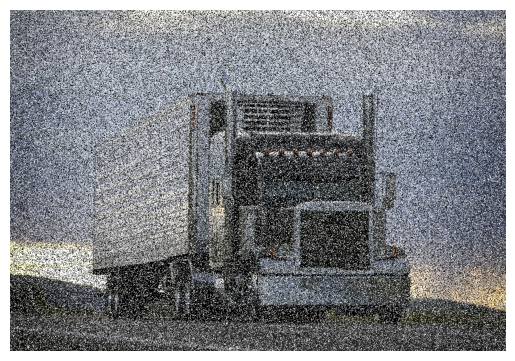

In [140]:
import numpy as np

def add_salt_and_pepper_noise(image, probability):
    noisy_image = np.copy(image)
    salt_coords = np.random.rand(*image.shape[:2]) < probability / 2
    noisy_image[salt_coords] = 255

    pepper_coords = np.random.rand(*image.shape[:2]) < probability / 2
    noisy_image[pepper_coords] = 0
    return noisy_image

noisy_img = add_salt_and_pepper_noise(img, 0.5)

plt.imshow(noisy_img)
plt.axis('off')
plt.show()

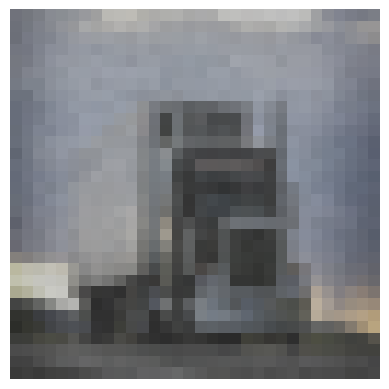

In [141]:
noisy_image_resized = Image.fromarray(noisy_img.astype('uint8'))
noisy_image_resized = noisy_image_resized.resize((32,32))
plt.imshow(noisy_image_resized)
plt.axis('off')
plt.show()

Resize reduce the effect of random noise: it's seems like actually depended on type of noise, but in this case salt and pepper will be vanished after resize

In [143]:
noisy_img_normal = np.array(noisy_image_resized) / 255.0  # Normalize pixel values

y_hat = model.predict(np.array([noisy_img_normal]))
print("This is " + class_names[np.argmax(y_hat)])

y_hat = model2.predict(np.array([noisy_img_normal]))
print("This is " + class_names[np.argmax(y_hat)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
This is truck
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
This is truck


It seems like model confuse when noise is added to resized image

In [144]:
noisy_img_normal = add_salt_and_pepper_noise(img_resized, 0.01)

y_hat = model.predict(np.array([noisy_img_normal]))
print("This is " + class_names[np.argmax(y_hat)])

y_hat = model2.predict(np.array([noisy_img_normal]))
print("This is " + class_names[np.argmax(y_hat)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
This is automobile
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
This is automobile
